In [26]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# 피쳐의 통계검정

카이제곱 검정의 독립성, 동일성 검정은 모두   
stats.contingency(dataframe)을 이용해서 볼 수 있음.  

독립성 검정의 의미가 (x,y)의 상관관계를 보고,
동일성 검정이 (x,y)내에서 x의 집단별 차이가 있는 지 확인을 위함인 줄 알았는데
그 독립성, 동일성 검정의 p-val이 0.05보다 차이가 없으므로, stats.contingency를 이용해서 독립성 및 동일성 검정을 진행하면 됨. 

In [27]:
df = pd.read_csv('/home/piai/바탕화면/파이썬_기초/빅데이터프로젝트/csv파일/텔레마케팅_파생변수.csv',index_col = 0) # 전처리된 df 불러오기

## 범주형 피처의 각 구분별 계약여부의 차이가 있는지 없는지
ex)
- H0: 미혼 vs 기혼 vs 결혼의 계약 여부 차이가 없다.
- H1: 미혼 vs 기혼 vs 결혼의 계약 여부 차이가 있다.

In [28]:
# 피처와 목표변수의 그룹화를 통해 크로스탭을 만들고 이를 카이제곱 동일성 검정 실행
def chk_homo(df,feature,target):
    data = df.groupby([feature,target],as_index = False)[target].value_counts() 
    d_table = pd.crosstab(index=data[feature],columns=data[target],
                      values=data["count"],aggfunc=sum,margins=True,margins_name="전체")
    chi,p,dof,expected = stats.chi2_contingency(d_table)
    print(f'p-value: {p:.3f}\n chi2q:{chi:.3f}\n dof:{dof:.3f}')
    if p< 0.05:
        print(f'{feature}별 {target}는 차이가 있다.')
    else:
        print(f'{feature}별 {target}는 차이가 없다.')

In [29]:
df.columns

Index(['연령', '직업군', '결혼여부', '학력', '신용카드소지여부', '주택대출여부', '개인대출여부', 'contact',
       '통화시간', '연락시도횟수', 'p_days', '과거통화횟수', '계약여부', '카드종류', '연락일', '연령대',
       '연락년도', '연락달', '연락날', '연락요일', '공휴일과평일', '혜택분야', '연회비', '연회비납부정도',
       '대학교구분', '통화시간_분', '직업급여별'],
      dtype='object')

연령대, 직업군, 학력, 연락시도횟수, contact, 대학교구분, 통화시간_분, 직업급여별,연락년도, 연락달, 연락요일,공휴일과 평일,혜택분야, 연회비, 연회비납부정도

In [31]:
for i in ['통화시간_분', '직업급여별','연락년도']:
    chk_homo(df,i,'계약여부')
    

p-value: nan
 chi2q:nan
 dof:3088.000
통화시간_분별 계약여부는 차이가 없다.
p-value: 0.000
 chi2q:596.455
 dof:8.000
직업급여별별 계약여부는 차이가 있다.
p-value: 1.000
 chi2q:0.004
 dof:4.000
연락년도별 계약여부는 차이가 없다.


In [32]:
for i in ['연령대', '직업군', '학력', '연락시도횟수', 'contact', '대학교구분']:
    chk_homo(df,i,'계약여부')
    

p-value: 0.000
 chi2q:1245.495
 dof:10.000
연령대별 계약여부는 차이가 있다.
p-value: 0.000
 chi2q:972.540
 dof:22.000
직업군별 계약여부는 차이가 있다.
p-value: 0.000
 chi2q:188.222
 dof:14.000
학력별 계약여부는 차이가 있다.
p-value: nan
 chi2q:nan
 dof:84.000
연락시도횟수별 계약여부는 차이가 없다.
p-value: 0.000
 chi2q:863.269
 dof:4.000
contact별 계약여부는 차이가 있다.
p-value: 0.000
 chi2q:100.558
 dof:4.000
대학교구분별 계약여부는 차이가 있다.


In [33]:
for i in ['연락달', '연락요일','공휴일과평일','혜택분야', '연회비', '연회비납부정도']:
    chk_homo(df,i,'계약여부')
    

p-value: 0.000
 chi2q:250.699
 dof:24.000
연락달별 계약여부는 차이가 있다.
p-value: 0.335
 chi2q:15.655
 dof:14.000
연락요일별 계약여부는 차이가 없다.
p-value: 0.546
 chi2q:3.070
 dof:4.000
공휴일과평일별 계약여부는 차이가 없다.
p-value: 0.958
 chi2q:9.063
 dof:18.000
혜택분야별 계약여부는 차이가 없다.
p-value: 1.000
 chi2q:69.758
 dof:228.000
연회비별 계약여부는 차이가 없다.
p-value: 1.000
 chi2q:0.000
 dof:2.000
연회비납부정도별 계약여부는 차이가 없다.


## 연속형 변수의 정규성 검정과 

In [ ]:
## 통화시간(초) 와 통화시간(분)의 정규성 검정

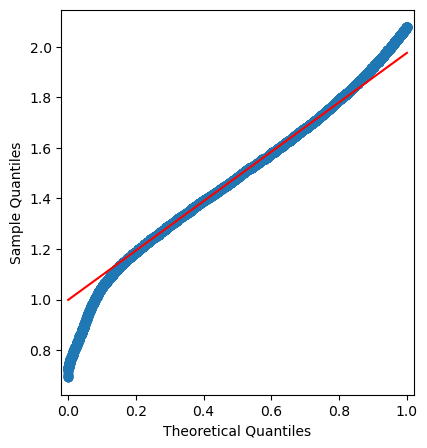

In [ ]:

temp = df[(df['통화시간_분']<6)]
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)
sm.qqplot(np.log1p(temp['통화시간_분']+1), line = 'q', dist = stats.uniform, ax = ax1)
plt.show()

In [ ]:
anderson = stats.anderson(np.log1p(temp['통화시간_분']))
anderson

AndersonResult(statistic=131.768791425784, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## 정규성 검정
- H0: 정규성이 있다
- H1: 정규성이 없다.

In [ ]:
# 라이브러리 호출
import numpy as np
from scipy.stats import anderson

anderson = stats.anderson(df['통화시간']) # 표본이 5000개 이상
anderson 

AndersonResult(statistic=2770.4509413149135, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

alpha_list = [15. , 10. ,  5. ,  2.5,  1. ] = [0.15, 0.1,0.05,0.25,0.01]이고 각각의 검정값은
[0.576, 0.656, 0.787, 0.918, 1.092])임.  
이때, 통계값 = 2770.450941314913 >>> 1.092(알파 = 0.01에서의 검정값) 이므로 정규성 H0기각-> 통화시간은 정규성 x

In [ ]:
temp = pd.Series(stats.boxcox(df['통화시간_분']+1)[0])
anderson = stats.anderson(temp) # 표본이 5000개 이상
anderson #

AndersonResult(statistic=10.057468696162687, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
anderson = stats.anderson(np.log1p(df['통화시간'])) # 표본이 5000개 이상
anderson # 

AndersonResult(statistic=92.89615157103253, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

alpha_list = [15. , 10. ,  5. ,  2.5,  1. ] = [0.15, 0.1,0.05,0.25,0.01]이고 각각의 검정값은
[0.576, 0.656, 0.787, 0.918, 1.092])임.  
이때, 통계값 = 92.89615157103253 >>> 1.092(알파 = 0.01에서의 검정값) 이므로 정규성 H0기각-> 통화시간은 정규성 x  
-> 통화시간(초)는 피처의 유의미성이 없음

In [ ]:
anderson = stats.anderson(np.log1p(df['통화시간_분'])) # 표본이 5000개 이상
anderson # 

AndersonResult(statistic=131.0353170635135, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

alpha_list = [15. , 10. ,  5. ,  2.5,  1. ] = [0.15, 0.1,0.05,0.25,0.01]이고 각각의 검정값은
[0.576, 0.656, 0.787, 0.918, 1.092])임.  
이때, 통계값 = 92.89615157103253 >>> 1.092(알파 = 0.01에서의 검정값) 이므로 정규성 H0기각-> 통화시간_분은 정규성 x  
-> 통화시간(분)은 로그를 취해도 피처의 유의미성이 없음

In [ ]:
anderson = stats.anderson(np.log1p(df['통화시간_분'])) # 표본이 5000개 이상
anderson # 

AndersonResult(statistic=131.0353170635135, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

정규성확인을 위한 그림 

In [ ]:
# 초의 기술통계량
pd.DataFrame(df['통화시간'].describe())

,통화시간
count,41188.000000
mean,258.285010
std,259.279249
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [ ]:
# 분의 기술통계량
pd.DataFrame(df['통화시간_분'].describe())

,통화시간_분
count,41188.000000
mean,4.304750
std,4.321321
min,0.000000
25%,1.700000
50%,3.000000
75%,5.316667
max,81.966667


In [ ]:
temp = pd.DataFrame(df.통화시간_분.value_counts()).reset_index().rename(columns = {'index':'통화시간(분)',
                                                                       '통화시간_분':'개수'}).sort_values('통화시간(분)', ascending= True)

In [ ]:
tmp2 = temp[temp['통화시간(분)'] < 20]

In [ ]:
tmp2 = temp[temp['통화시간(분)'] < 20]

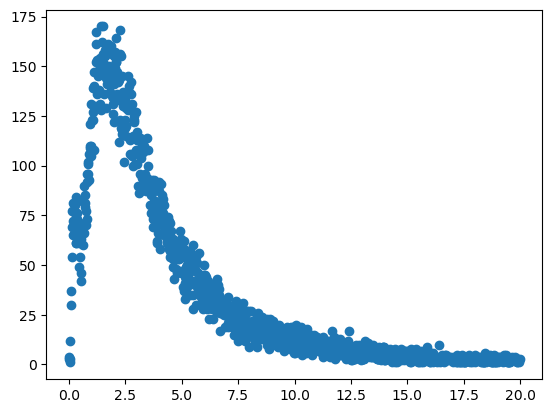

In [ ]:
#plt.scatter(temp['통화시간(분)'],temp['개수'])
plt.scatter(tmp2['통화시간(분)'],tmp2['개수'])

In [ ]:
temp = pd.Series(stats.boxcox(tmp2['통화시간(분)']+1)[0])
anderson = stats.anderson(temp) # 표본이 5000개 이상
anderson

AndersonResult(statistic=11.790167779551666, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
len(df[(df['계약여부'] == 'yes')])

4640

In [ ]:
len(df[(df['통화시간_분'] > 20) & (df['계약여부'] == 'yes')])

321

In [ ]:
len(df[(df['통화시간_분'] > 20)])

513

In [ ]:
len(df[(df['통화시간_분'] < 20) & (df['계약여부'] == 'yes')])

4319

In [ ]:
len(df[(df['통화시간_분'] < 20)])

40673